# Pneumonia Detection Using Deep Learning

- Download the dataset
- Use that dataset to train our model
- Download our best model
- Create a flask app
  - Frontend <-> Backend <-> Model

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content

!unzip /content/chest-xray-pneumonia.zip -d /content/chest-xray-pneumonia



Streaming output truncated to the last 5000 lines.
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/

In [ ]:
import os, shutil
import random
import numpy as np
import pandas as pd
import cv2
import skimage
import skimage.segmentation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 128

def get_data(data_dir):
  data = []
  for label in labels:
    print(label)
    path = os.path.join(data_dir, label)
    class_num = labels.index(label) # 0/1
    if class_num == 1:
      print("Normal")
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        if img_arr is None:
          continue #skip image if there is any issue

        resized_arr = cv2.resize(img_arr, (img_size, img_size))
        if class_num == 1:
          print([resized_arr, class_num])
        data.append([resized_arr, class_num]) # data = [[.......], 0/1], [....., 0/1]]
      except Exception as e:
        print(f"Error in processing {img}: {e}")
  return data


In [ ]:
train = get_data("/content/chest-xray-pneumonia/chest_xray/train")
test = get_data("/content/chest-xray-pneumonia/chest_xray/test")
val = get_data("/content/chest-xray-pneumonia/chest_xray/val")

Streaming output truncated to the last 5000 lines.
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 2,  0,  0, ...,  0,  0,  0]], dtype=uint8), 1]
[array([[ 0,  0, 14, ..., 65, 50, 47],
       [ 0,  0,  6, ..., 60, 46, 41],
       [ 0,  0,  1, ..., 59, 52, 44],
       ...,
       [ 0,  0, 22, ...,  0,  0,  0],
       [ 0,  0, 23, ...,  0,  0,  0],
       [ 0,  0, 25, ...,  0,  0,  0]], dtype=uint8), 1]
[array([[165, 174, 106, ..., 175, 101, 105],
       [135, 148, 199, ..., 105, 105, 108],
       [133, 131, 142, ..., 105, 110, 109],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[123, 107, 147, ..., 135, 120, 123],
       [126, 104, 143, ..., 102, 132, 118],
       [120, 100, 139, ...,  60,  87, 116],
       ...,
       [  0,   0,   0, ...,  19,   0,   0],
       [  0,   0,   0, ...,  24,   0,   0],
       [  0,   0,   0, ...,  3

In [ ]:
for _, i in train:
  if i == 1:
    print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
pnuemonia = os.listdir("/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA")
pnuemonia_dir = "/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"

In [ ]:
pnuemonia

['person423_bacteria_1856.jpeg',
 'person55_bacteria_261.jpeg',
 'person522_bacteria_2210.jpeg',
 'person984_bacteria_2911.jpeg',
 'person61_bacteria_294.jpeg',
 'person110_virus_205.jpeg',
 'person472_bacteria_2008.jpeg',
 'person256_virus_537.jpeg',
 'person1555_bacteria_4059.jpeg',
 'person991_bacteria_2918.jpeg',
 'person327_virus_679.jpeg',
 'person960_virus_1633.jpeg',
 'person569_bacteria_2360.jpeg',
 'person808_virus_1442.jpeg',
 'person70_bacteria_345.jpeg',
 'person502_bacteria_2122.jpeg',
 'person348_virus_720.jpeg',
 'person51_bacteria_245.jpeg',
 'person941_virus_1610.jpeg',
 'person838_virus_1476.jpeg',
 'person1799_bacteria_4647.jpeg',
 'person1514_bacteria_3964.jpeg',
 'person512_bacteria_2154.jpeg',
 'person753_bacteria_2656.jpeg',
 'person1418_bacteria_3636.jpeg',
 'person429_virus_877.jpeg',
 'person1921_bacteria_4828.jpeg',
 'person1562_bacteria_4087.jpeg',
 'person1496_bacteria_3908.jpeg',
 'person761_virus_1389.jpeg',
 'person9_bacteria_38.jpeg',
 'person621_virus

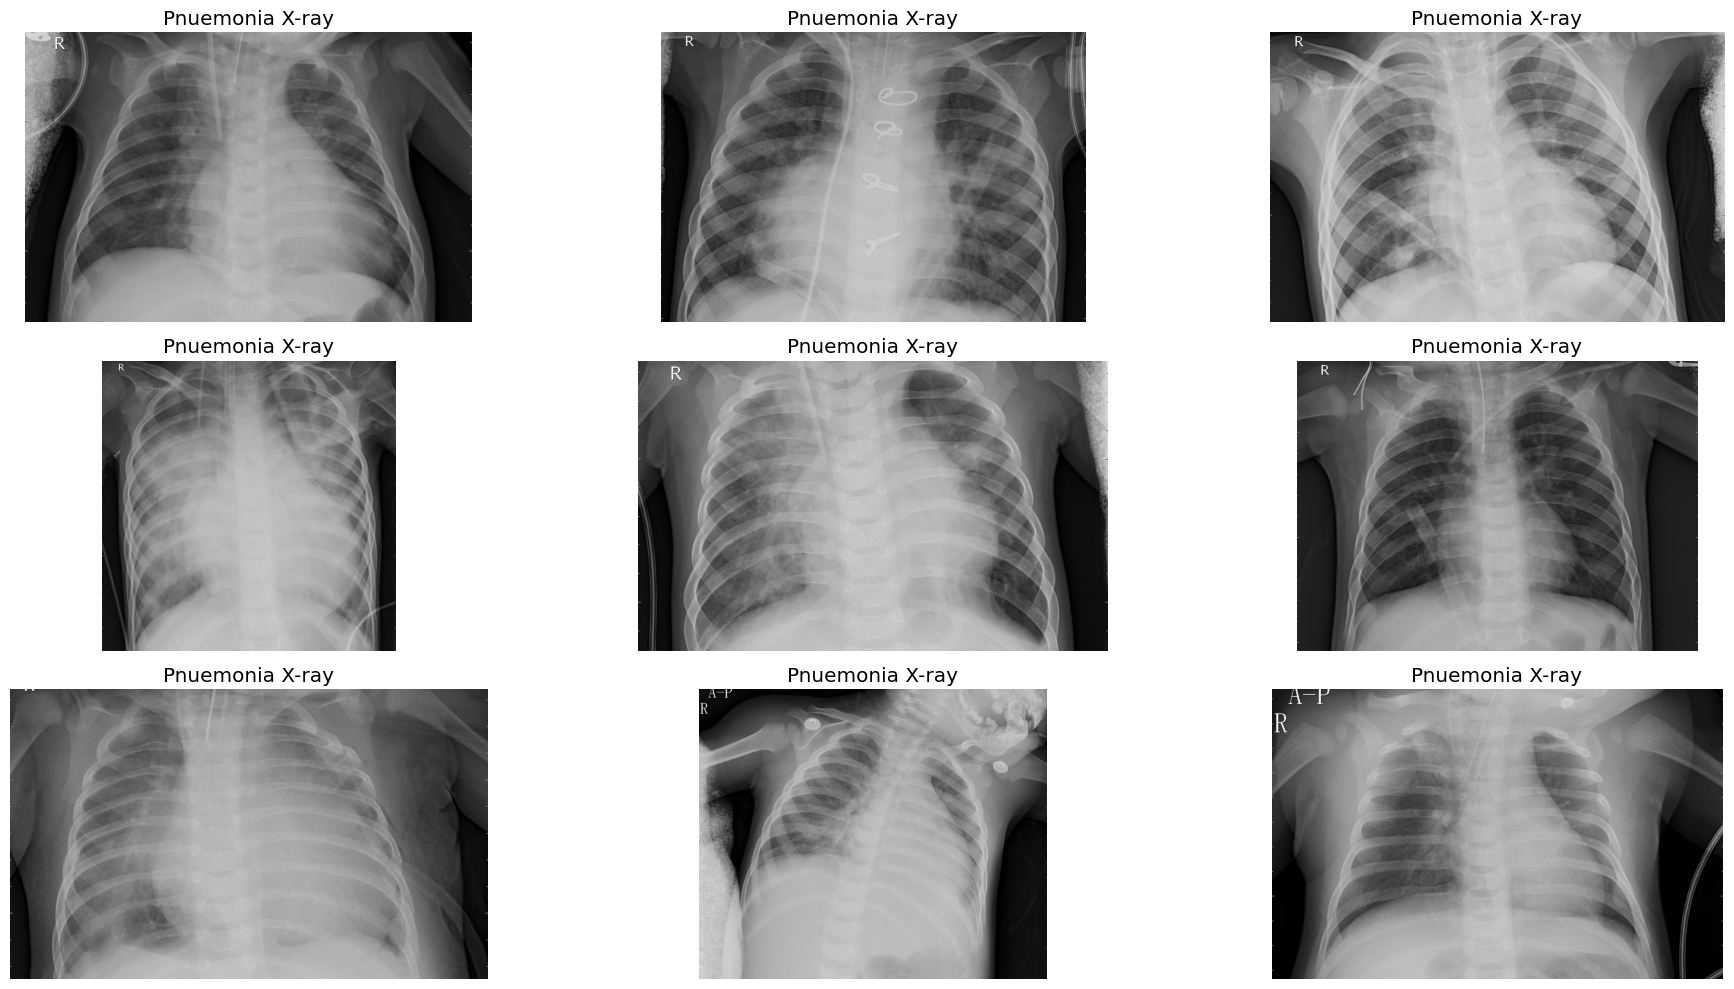

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(9):
  plt.subplot(3, 3, i+1)
  img = plt.imread(os.path.join(pnuemonia_dir, pnuemonia[i]))
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title("Pnuemonia X-ray")

plt.tight_layout()



In [ ]:
normal = os.listdir("/content/chest-xray-pneumonia/chest_xray/train/NORMAL")
normal_dir = "/content/chest-xray-pneumonia/chest_xray/train/NORMAL"


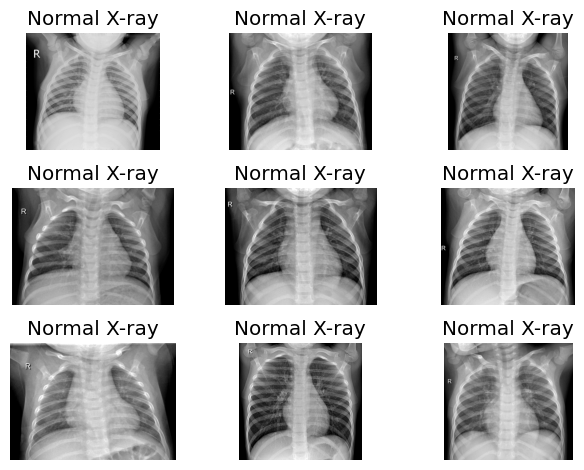

In [ ]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  img = plt.imread(os.path.join(normal_dir, normal[i]))
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title("Normal X-ray")

plt.tight_layout()

['Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia'

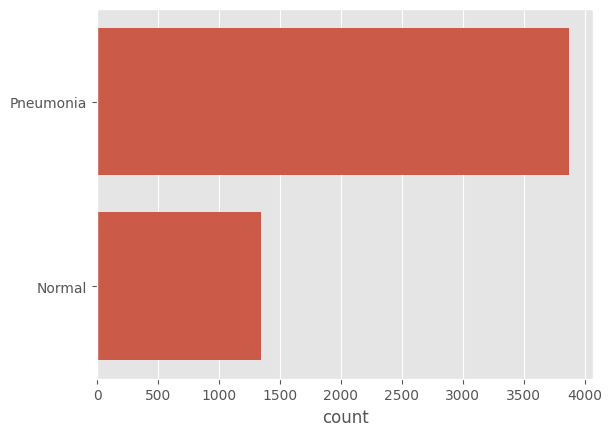

In [ ]:
listx = []
for i in train:
  if(i[1]==0):
    listx.append("Pneumonia")
  else:
    listx.append("Normal")
sns.countplot(listx)

print(listx)

In [ ]:
#Data Augmentation & Resizing

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   horizontal_flip = 0.4,
                                   vertical_flip = 0.4,
                                   rotation_range = 40,
                                   shear_range = 0.2,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   fill_mode = "nearest")

valid_datagen = ImageDataGenerator(rescale=1./255)
test_dategen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory("/content/chest-xray-pneumonia/chest_xray/chest_xray/train",
                                                    batch_size = 32,
                                                    target_size = (128, 128),
                                                    class_mode = 'categorical',
                                                    shuffle = True,
                                                    seed = 42,
                                                    color_mode = 'rgb')

valid_generator = valid_datagen.flow_from_directory("/content/chest-xray-pneumonia/chest_xray/chest_xray/val",
                                                    batch_size = 32,
                                                    target_size = (128, 128),
                                                    class_mode = 'categorical',
                                                    shuffle = True,
                                                    seed = 42,
                                                    color_mode = 'rgb')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
class_labels = train_generator.class_indices

In [ ]:
class_labels

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
class_name = {value:key for (key, value) in class_labels.items()}

In [ ]:
class_name

{0: 'NORMAL', 1: 'PNEUMONIA'}

In [ ]:
# VGG 19 CNN Architecture

In [ ]:
base_model = VGG19(input_shape=(128, 128, 3),
                   include_top=False,
                   weights='imagenet')

for layer in base_model.layers:
  layer.trainable = False

x = base_model.output

flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)

dropout = Dropout(0.2)(class_1)

class_2 = Dense(1152, activation='relu')(dropout)

output = Dense(2, activation='softmax')(class_2)

model_01 = Model(base_model.inputs, output)

model_01.summary()



80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 63,089,602 (240.67 MB)

 Trainable params: 43,065,218 (164.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
import numpy as np
import pandas as pd

or_data = pd.Dataframe()
and_data = pd.Dataframe()

xor_data